In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator

In [11]:
# Set parameters here 
INPUT_SIZE = 256
mapping = {0:'normal', 1:'other'}
NUMCLASSES = len(mapping)
LESS_TRAIN = 2000
LESS_VAL = 500

folder = r'C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih'

trainFolder = folder + r'\train'
valFolder = folder + r'\val'
testFolder = folder + r'\test'


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=5,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   validation_split = .2)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .2)

In [13]:
training_set = train_datagen.flow_from_directory(trainFolder,
                                       target_size=(INPUT_SIZE, INPUT_SIZE),
                                                batch_size=16,
                                     class_mode='categorical',
                                            subset='training')

validation_set = test_datagen.flow_from_directory(valFolder,
                                        target_size=(INPUT_SIZE, INPUT_SIZE),
                                                 batch_size=32,
                                      class_mode='categorical',
                                               shuffle = False,
                                           subset='validation')

Found 8004 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


In [14]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import *
from keras.optimizers import *
#from sklearn.model_selection import train_test_split
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

model = Sequential()

model.add(InputLayer(input_shape=[INPUT_SIZE,INPUT_SIZE,3])) #keras will internally add batch dimension

model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())


model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(NUMCLASSES,activation='softmax'))


model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)       

In [15]:
#Training
c_weights = {0: 0.4, 1: 0.6}

history = model.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=100,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

model.save_weights("model-normalized.h5")
print("Saved model to disk")


Epoch 1/100
501/501 [==============================] - 248s 496ms/step - loss: 0.6953 - accuracy: 0.5166 - val_loss: 0.7117 - val_accuracy: 0.4988
Epoch 2/100
501/501 [==============================] - 147s 294ms/step - loss: 0.6915 - accuracy: 0.5245 - val_loss: 0.7070 - val_accuracy: 0.5287
Epoch 3/100
501/501 [==============================] - 263s 526ms/step - loss: 0.6876 - accuracy: 0.5410 - val_loss: 0.7139 - val_accuracy: 0.6022
Epoch 4/100
501/501 [==============================] - 198s 395ms/step - loss: 0.6849 - accuracy: 0.5543 - val_loss: 0.7308 - val_accuracy: 0.5860
Epoch 5/100
501/501 [==============================] - 348s 694ms/step - loss: 0.6813 - accuracy: 0.5595 - val_loss: 0.7323 - val_accuracy: 0.6047
Epoch 6/100
501/501 [==============================] - 157s 312ms/step - loss: 0.6775 - accuracy: 0.5813 - val_loss: 0.7670 - val_accuracy: 0.6010
Epoch 7/100
501/501 [==============================] - 353s 704ms/step - loss: 0.6769 - accuracy: 0.5832 - val_loss: 0

320/501 [==================>...........] - ETA: 52s - loss: 0.6499 - accuracy: 0.6306

KeyboardInterrupt: 

In [16]:
history.history.keys()

NameError: name 'history' is not defined

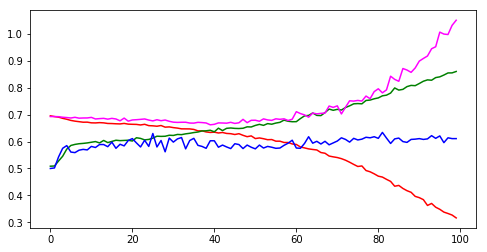

In [17]:
fig = plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['acc'],color='green')
plt.plot(history.history['val_loss'],color='magenta')
plt.plot(history.history['val_acc'],color='blue')
plt.show()